In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Plots

## Box plot

## Scatter plot

## QQ - plot

# Distributions


Discrete distributions:
- Binomial distribution
- Hypergeometric distribution
- Poisson distribution

Contiunous distribution:
- Uniform distribution
- Normal Distribution
- Exponential Distribtion

## Binomial distribution
1. **Mean (Expected Value):** $\mathbb{E}[X] = n \cdot p$
2. **Variance:** $\text{Var}(X) = n \cdot p \cdot (1 - p)$
3. **Standard Deviation:** $\sigma = \sqrt{n \cdot p \cdot (1 - p)}$

### Binom PMF P(X = K)

In [ ]:
# Parameters for the binomial distribution
n = 10      # number of trials
p = 0.6     # probability of success
k = 5       # Testing Value

# P(X = 5)
retval_eq_k = stats.binom.pmf(k=k ,n=n, p=p)

# Print result
print(f"P(X = {k}) = {retval_eq_k}")

# Get mean and variance
mean, var = stats.binom.stats(n=n, p=p)
print(f"Mean: {mean}")
print(f"Variance: {var}")

### Binom CDF: P(X > k)

In [ ]:
# Parameters for the binomial distribution
n = 10       # number of trials
p = 0.6      # probability of success
k = 4        # Testing Value

# P(X > k)
retval_greater_than_k = 1 - stats.binom.cdf(k, n, p)  # CDF for k
# Print result
print(f"P(X > {k}) = {retval_greater_than_k}")

# Get mean and variance
mean, var = stats.binom.stats(n=n, p=p)
print(f"Mean: {mean}")
print(f"Variance: {var}")

### Binom CDF: P(X < k)

In [ ]:
# Parameters for the binomial distribution
n = 10       # number of trials
p = 0.6      # probability of success
k = 5        # Testing Value

# P(X < 5) = P(X <= 4)
retval_less_than_k = stats.binom.cdf(k - 1, n, p)  # CDF for k - 1'
print(f"P(X < {k}) = {retval_less_than_k}")

# Get mean and variance
mean, var = stats.binom.stats(n=n, p=p)
print(f"Mean: {mean}")
print(f"Variance: {var}")

## Poisson distribution
1. **Mean (Expected Value):** $ \mathbb{E}[X] = \lambda $
2. **Variance:** $ \text{Var}(X) = \lambda $
3. **Standard Deviation:** $ \sigma = \sqrt{\lambda} $


### Connection Between Poisson and Exponential Distributions

The **Poisson** and **Exponential** distributions are closely related as they both arise from **Poisson processes**, which model events occurring randomly over time or space.

#### 1. Connection
- The **Poisson distribution** models the **number of events** that occur in a fixed interval of time or space, given a constant rate \( \lambda \).
- The **Exponential distribution** models the **time between consecutive events** in a Poisson process, also with rate \( \lambda \).
- Key Relationship:
  - If events follow a Poisson process:
    - The count of events in an interval is Poisson distributed.
    - The time until the next event (or between events) is exponentially distributed.

#### 2. When to Use Poisson
Use the Poisson distribution when you need to calculate the **probability of a specific number of events** occurring in a fixed interval. Examples include:
- The number of calls received by a call center in an hour.
- The number of accidents occurring on a highway in a day.

#### 3. When to Use Exponential
Use the Exponential distribution when you want to model the **time between events** in a Poisson process. Examples include:
- The time until the next customer arrives at a service desk.
- The time between failures of a machine.

### Poisson PMF: P(X = k)

In [ ]:
# Parameters for Poisson distribution
lambda_val = 10/4  # mean (expected number of events)

k = 10           # number of events we want the probability for

# Calculate Poisson PMF
poisson_pmf = stats.poisson.pmf(k, lambda_val)
print(f"P(X = {k}) = {poisson_pmf}")

1.0
P(X = 10) = 0.00021572518449585165


### Poisson CDF: P(X < k)

In [ ]:
# Parameters for Poisson distribution
lambda_val = 15/6  # mean (expected number of events)
k = 2           # upper limit of events for cumulative probability

# Calculate Poisson CDF for P(X < k), which is actually P(X <= k-1)
poisson_cdf = stats.poisson.cdf(k - 1, lambda_val)

print(f"P(X < {k}) = {poisson_cdf}")


### Poisson CDF: P(X > k)

In [ ]:

# Parameters
lambda_val = 15/6  # mean (expected number of events)
k = 2           # lower limit of events for the "greater than" probability

# Calculate Poisson CDF for P(X > k)
poisson_prob_greater = 1 - stats.poisson.cdf(k, lambda_val)

print(f"P(X > {k}) = {poisson_prob_greater}")

## Hypergeometric distribution

Let $X \sim \text{Hypergeometric}(N, K, n)$, where:
- $N$ is the population size,
- $K$ is the number of successes in the population,
- $n$ is the number of draws.

1. **Mean (Expected Value):** $\mathbb{E}[X] = n \cdot \frac{K}{N}$


2. **Variance:** $\text{Var}(X) = n \cdot \frac{K}{N} \cdot \frac{N - K}{N} \cdot \frac{N - n}{N - 1}$


3. **Standard Deviation:** $\sigma = \sqrt{n \cdot \frac{K}{N} \cdot \frac{N - K}{N} \cdot \frac{N - n}{N - 1}}$

### Hyper PMF: P(X = k)

In [ ]:
# Parameters for the hypergeometric distribution
N = 20       # Total population size
K = 12       # Number of successes in the population
n = 10       # Sample size
k = 5        # Testing value for exactly 5 successes

# P(X = k)
retval_equal_to_k = stats.hypergeom.pmf(k, N, K, n)  # PMF for k
print(f"P(X = {k}) = {retval_equal_to_k:.4f}")

mean, var = stats.hypergeom.stats(N, K, n)
print(f"Mean: {mean}")
print(f"Variance: {var}")

### Hyper CDF: P(X < k)

In [ ]:
# Parameters for the hypergeometric distribution
N = 20       # Total population size
K = 12       # Number of successes in the population
n = 10       # Sample size

k = 5        # Testing threshold

# P(X < 5) = P(X <= 4)
retval_less_than_k = stats.hypergeom.cdf(k - 1, N, K, n)  # CDF for k - 1
print(f"P(X < {k}) = {retval_less_than_k:.4f}")


mean, var = stats.hypergeom.stats(N, K, n)
print(f"Mean: {mean}")
print(f"Variance: {var}")

### Hyper CDF: P(X > k)

In [ ]:
# Parameters for the hypergeometric distribution
N = 20       # Total population size
K = 12       # Number of successes in the population
n = 10       # Sample size
k = 5        # Testing threshold

# P(X > k) = 1 - P(X <= k)
retval_greater_than_k = 1 - stats.hypergeom.cdf(k, N, K, n)
print(f"P(X > {k}) = {retval_greater_than_k:.4f}")

mean, var = stats.hypergeom.stats(N, K, n)
print(f"Mean: {mean}")
print(f"Variance: {var}")

## Uniform Distrubution
1. **Mean (Expected Value):**  $\mathbb{E}[X] = \frac{a + b}{2}$
2. **Variance:**  $\text{Var}(X) = \frac{(b - a)^2}{12}$
3. **Standard Deviation:**  $\sigma = \frac{b - a}{\sqrt{12}}$


### Uniform: P(X < k)

In [ ]:
from scipy.stats import uniform

# Parameters
a = 0        # Lower bound of the distribution
b = 10       # Upper bound of the distribution
k = 6        # Value to calculate P(X < k)

# Calculate Uniform CDF for P(X < k)
uniform_cdf = uniform.cdf(k, loc=a, scale=b - a)

print(f"P(X < {k}) = {uniform_cdf}")

# Calculate mean and variance
mean, var = uniform.stats(loc=a, scale=b - a, moments='mv')
print(f"Mean: {mean}")
print(f"Variance: {var}")

### Uniform: P(X > k)

In [ ]:
from scipy.stats import uniform

# Parameters
a = 0        # Lower bound of the distribution
b = 10       # Upper bound of the distribution
k = 6        # Value to calculate P(X > k)

# Calculate Uniform CDF for P(X < k)
uniform_cdf = uniform.cdf(k, loc=a, scale=b - a)

# Calculate P(X > k)
uniform_sf = 1 - uniform_cdf  # Alternatively, use survival function: uniform.sf(k, loc=a, scale=b - a)

print(f"P(X > {k}) = {uniform_sf}")

# Calculate mean and variance
mean, var = uniform.stats(loc=a, scale=b - a, moments='mv')
print(f"Mean: {mean}")
print(f"Variance: {var}")

## Normal distribution

1. **Mean (Expected Value):** $ \mathbb{E}[X] = \mu $
2. **Variance:** $ \text{Var}(X) = \sigma^2 $
3. **Standard Deviation:** $ \sigma = \sqrt{\sigma^2} $


### Normal: P(X < k)

In [ ]:
# Parameters
mu = 0        # mean of the distribution
sigma = 1     # standard deviation of the distribution
k = 1.5       # value to calculate P(X < k)

# Calculate Normal CDF for P(X < k)
normal_cdf = stats.norm.cdf(k, mu, sigma)

print(f"P(X < {k}) = {normal_cdf}")

# Calculate mean and variance
mean, var = stats.norm.stats(loc=mu, scale=sigma)
print(f"Mean: {mean}")
print(f"Variance: {var}")



### Normal: P(X > k)

In [ ]:
# Parameters
mu = 0        # mean of the distribution
sigma = 1     # standard deviation of the distribution
k = 1.5       # value to calculate P(X > k)

# Calculate Normal CDF for P(X > k)
normal_prob_greater = 1 - stats.norm.cdf(k, mu, sigma)

print(f"P(X > {k}) = {normal_prob_greater}")


# Calculate mean and variance
mean, var = stats.norm.stats(loc=mu, scale=sigma)

print(f"Mean: {mean}")
print(f"Variance: {var}")

## Exponential Distribtion

1. **Mean (Expected Value):** $ \mathbb{E}[X] = \frac{1}{\lambda} $
2. **Variance:** $ \text{Var}(X) = \frac{1}{\lambda^2} $
3. **Standard Deviation:** $ \sigma = \frac{1}{\lambda} $

### Exponential: P(X < k)

In [56]:
# Parameters
lambda_val = 15/60
rate_param = 1 / lambda_val

k = 2

# Calculate Exponential CDF for P(X < k)
expo_cdf = stats.expon.cdf(k, scale=rate_param)

print(f"P(X < {k}) = {expo_cdf}")

# Calculate mean and variance
mean, var = stats.expon.stats(scale=rate_param)
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X < 2) = 0.3934693402873666
Mean: 4.0
Variance: 16.0


### Exponential: P(X > k)


In [59]:
# Parameters
lambda_val = 15/60
rate_param = 1 /lambda_val

k = 2

# Calculate Exponential CDF for P(X > k)
expo_prob_greater = 1 - stats.expon.cdf(k, scale=rate_param)

print(f"P(X > {k}) = {expo_prob_greater}")

# Calculate mean and variance
mean, var = stats.expon.stats(scale=rate_param)
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X > 2) = 0.6065306597126334
Mean: 4.0
Variance: 16.0


## Log-Normal Distribution

1. **Mean (Expected Value):**  $ \mathbb{E}[X] = e^{\mu + \frac{\sigma^2}{2}} $
2. **Variance:**  $ \text{Var}(X) = \left(e^{\sigma^2} - 1\right) e^{2\mu + \sigma^2} $
3. **Standard Deviation:**   $ \sigma_X = \sqrt{\text{Var}(X)} = \sqrt{\left(e^{\sigma^2} - 1\right) e^{2\mu + \sigma^2}} $

### log-normal: P(X > k)

In [28]:
import scipy.stats as stats
import numpy as np

# Parameters
mu = 0.5  # Mean of the underlying normal distribution
sigma = 0.25  # Standard deviation of the underlying normal distribution
k = 2  # Threshold value

# Calculate P(X > k)
prob_greater = 1 - stats.lognorm.cdf(k, s=sigma, scale=np.exp(mu))

print(f"P(X > {k}) = {prob_greater}")


# Calculate mean and variance
mean, var = stats.lognorm.stats(s=sigma, scale=np.exp(mu), moments='mv')

print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X > 2) = 0.21988291048777586
Mean: 1.7010573018484005
Variance: 0.18662090474626997


### log-normal: P(X < k)

In [29]:
import scipy.stats as stats
import numpy as np

# Parameters
mu = 0.5  # Mean of the underlying normal distribution
sigma = 0.25  # Standard deviation of the underlying normal distribution
k = 2  # Threshold value

# Calculate P(X < k)
prob_less = stats.lognorm.cdf(k, s=sigma, scale=np.exp(mu))

print(f"P(X < {k}) = {prob_less}")

# Calculate mean and variance
mean, var = stats.lognorm.stats(s=sigma, scale=np.exp(mu), moments='mv')

print(f"Mean: {mean}")
print(f"Variance: {var}")


P(X < 2) = 0.7801170895122241
Mean: 1.7010573018484005
Variance: 0.18662090474626997


# Confidence Intervals

## One Sample

### Normally distributed:

#### With Z-distribution:
**Use the Z-distribution (standard normal) when:**
   - The population standard deviation ($\sigma$) is **known**.
   - The sample size is large ($n > 30$), even if $\sigma$ is unknown (due to the Central Limit Theorem).

In [67]:
# Define inputs
sample_mean = 34.66  # Example: mean duration
sample_std = 10.12    # Example: standard deviation
sample_size = 40   # Example: sample size
confidence_level = 0.99

# Calculate Z-score for 99% confidence
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Compute margin of error
margin_of_error = z_score * (sample_std / np.sqrt(sample_size))

# Calculate confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error


print(f"CI: [{lower_bound:.2f};{upper_bound:.2f}]")

CI: [30.54;38.78]


#### With t-Distribution
**Use the $t$-distribution when:**
   - The population standard deviation ($\sigma$) is **unknown**.
   - The sample size is small ($n \leq 30$), making the normal approximation unreliable.

In [3]:
# Inputs
mean = 34.66  # Sample mean
s = 10.12  # Sample standard deviation
n = 40  # Sample size
confidence_level = 0.99

# Degrees of freedom
df = n - 1

# t-score
t_score = stats.t.ppf(1 - (1 - confidence_level) / 2, df)

# Confidence interval
margin_of_error = t_score * (s / np.sqrt(n))
lower = mean - margin_of_error
upper = mean + margin_of_error

print(f"CI: [{lower:.2f}, {upper:.2f}]")

CI: [30.33, 38.99]


## Two Sample

# Hypothesis Testing

## P-value

**One tailed vs Two tailed:**


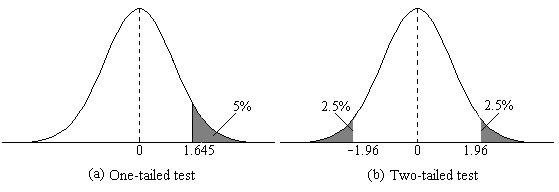


### Two Tailed

In [11]:
# Inputs
sample_mean = 34.66      # Replace with the sample mean (x̄)
pop_mean = 30         # Population mean under H0 (μ)
sample_std = 10.12        # Sample standard deviation (s)
sample_size = 40      # Sample size (n)

alpha = 0.05          # Significance level

# Calculate the test statistic
t_statistic = (sample_mean - pop_mean) / (sample_std / np.sqrt(sample_size))

# Degrees of freedom
df = sample_size - 1

# Calculate the two-tailed p-value
p_value = 2 * stats.t.sf(np.abs(t_statistic), df)

# Output
print(f"Test Statistic (t): {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Decision
if p_value < alpha:
    print("Reject the null hypothesis (H0).")
else:
    print("Fail to reject the null hypothesis (H0).")

Test Statistic (t): 2.9123
P-Value: 0.0059
Reject the null hypothesis (H0).


### One Tailed


In [12]:
# Inputs
sample_mean = 34.66   # Replace with the sample mean (x̄)
pop_mean = 30         # Population mean under H0 (μ)
sample_std = 10.12    # Sample standard deviation (s)
sample_size = 40      # Sample size (n)
alpha = 0.05          # Significance level

# Calculate the test statistic
t_statistic = (sample_mean - pop_mean) / (sample_std / np.sqrt(sample_size))

# Degrees of freedom
df = sample_size - 1

# One-tailed p-value
# Uncomment the appropriate line for the test direction
p_value = stats.t.sf(t_statistic, df)  # Right-tailed test (H_a: μ > μ0)
# p_value = stats.t.cdf(t_statistic, df)  # Left-tailed test (H_a: μ < μ0)

# Output
print(f"Test Statistic (t): {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Decision
if p_value < alpha:
    print("Reject the null hypothesis (H0).")
else:
    print("Fail to reject the null hypothesis (H0).")

Test Statistic (t): 2.9123
P-Value: 0.0030
Reject the null hypothesis (H0).


# Linear Regression

## Simple Linear Regression

### Model Creation

In [15]:
# data x
x = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500])

# data to be predicted
y = np.array([2.33, 4.21, 6.01, 7.51, 8.46, 8.93, 9.45, 10.70, 10.55, 10.74])

fit = smf.ols('y ~ x', data=pd.DataFrame({'x':x, 'y':y})).fit()
print(fit.summary(slim=True))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.894
No. Observations:                  10   F-statistic:                     77.07
Covariance Type:            nonrobust   Prob (F-statistic):           2.22e-05
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8953      0.642      4.512      0.002       1.415       4.375
x              0.0182      0.002      8.779      0.000       0.013       0.023

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


c:\Users\tobia\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Confidence Interval:

In [ ]:
conf_interval_99 = fit.conf_int(alpha=0.01)
conf_interval_95 = fit.conf_int(alpha=0.05)
conf_interval_90 = fit.conf_int(alpha=0.10)

# Format and display results
print("Confidence Intervals for Regression Coefficients beta_0 and beta_1\n")
print("99% Confidence Interval:")
print(conf_interval_99.to_string(header=["Lower Bound", "Upper Bound"], index=["Intercept (b0)", "Slope (b1)"]))
print("\n95% Confidence Interval:")
print(conf_interval_95.to_string(header=["Lower Bound", "Upper Bound"], index=["Intercept (b0)", "Slope (b1)"]))
print("\n90% Confidence Interval:")
print(conf_interval_90.to_string(header=["Lower Bound", "Upper Bound"], index=["Intercept (b0)", "Slope (b1)"]))

### Prediction Interval:

In [ ]:
x = 2.5

new_x = pd.DataFrame({'x': [x]})

# Get 99% prediction intervals for these values
prediction_99 = fit.get_prediction(new_x).summary_frame(alpha=0.01)
# Get 95% prediction interval
prediction_95 = fit.get_prediction(new_x).summary_frame(alpha=0.05)
# Get 90% prediction interval
prediction_90 = fit.get_prediction(new_x).summary_frame(alpha=0.10)


# Print each prediction interval
print("99% Prediction Interval for x = 2.5:")
print(prediction_99[['mean', 'obs_ci_lower', 'obs_ci_upper']])

print("\n95% Prediction Interval for x = 2.5:")
print(prediction_95[['mean', 'obs_ci_lower', 'obs_ci_upper']])

print("\n90% Prediction Interval for x = 2.5:")
print(prediction_90[['mean', 'obs_ci_lower', 'obs_ci_upper']])


### Residuals:

In [ ]:
residuals = fit.resid

print("Residuals:")
print(residuals)

print(np.sqrt(fit.mse_resid))

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot residuals against the fitted values
axs[0].scatter(fit.fittedvalues, residuals, color='blue', s=100, alpha=0.7, edgecolor='k', label='Residuals')
axs[0].axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Line')
axs[0].set_xlabel("Fitted Values", fontsize=14)
axs[0].set_ylabel("Residuals", fontsize=14)
axs[0].set_title("Residual Plot", fontsize=16)
axs[0].legend()
axs[0].grid()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=axs[1])
axs[1].set_title("Q-Q Plot of Residuals", fontsize=16)
axs[1].set_xlabel("Theoretical Quantiles", fontsize=14)
axs[1].set_ylabel("Sample Quantiles", fontsize=14)
axs[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()
plt.show()

# Statistical analysis

| **Analysis Type**              | **Use When**                                                                                  | **Example**                                                                                     |
|---------------------------------|----------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| **Multiple Linear Regression**  | Continuous response, multiple predictors, or goal is prediction                              | Modeling how diet and exercise influence weight.                                               |
| **Independence Test (r × c)**   | Testing association between two categorical variables                                         | Testing if feed type and health status are related.                                             |
| **Paired t-Test**               | Comparing means in **dependent** samples (pre-post measures or matched pairs)                | Comparing weight before and after treatment for the same chickens.                             |
| **One-way ANOVA**               | Comparing means in **three or more independent groups**                                       | Testing if mean weight change differs across three feed types.                                  |
| **t-Test**                      | Comparing means in **two independent groups**                                                | Testing if mean weight change differs between Feed A and Feed B.   

In [ ]:
mean = 34.66
std = 10.12




1.999384976933878
